**UERJ – Machine Learning project**

In [1]:
# Hardware accelerator GPU
!df -h .

Filesystem      Size  Used Avail Use% Mounted on
overlay          79G   38G   41G  48% /


In [2]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 85
model name	: Intel(R) Xeon(R) CPU @ 2.00GHz
stepping	: 3
microcode	: 0x1
cpu MHz		: 2000.180
cache size	: 39424 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm mpx avx512f avx512dq rdseed adx smap clflushopt clwb avx512cd avx512bw avx512vl xsaveopt xsavec xgetbv1 xsaves arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale

## **Importando pacotes e lendo arquivos:**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Fixando a semente
np.random.seed(42)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:

train_images = pd.read_csv('/content/drive/My Drive/Colab Notebooks/projectML/train_images.csv', sep = ',', header = None)
train_labels = pd.read_csv('/content/drive/My Drive/Colab Notebooks/projectML/train_labels.csv')
test_images  = pd.read_csv('/content/drive/My Drive/Colab Notebooks/projectML/test_images.csv', sep = ',', header = None)
test_labels  = pd.read_csv('/content/drive/My Drive/Colab Notebooks/projectML/test_labels.csv')

print(train_images.shape)
print(test_images.shape)


Redimensionando os dados para utilização no treinamento:

In [ ]:
train_images_format   = np.reshape( train_images.values, (-1, 110, 110, 1) )
test_images_format    = np.reshape( test_images.values, (-1, 110, 110, 1) )

print( train_images_format.shape )
print( test_images_format.shape )

## Verificando as características presentes no dataset e seus valores:

In [ ]:
print( train_labels.head(), "\n" )
print( test_labels.head(), "\n" )

   Volcano?  Type  Radius  Number Volcanoes
0         1   3.0   17.46               1.0
1         0   NaN     NaN               NaN
2         0   NaN     NaN               NaN
3         0   NaN     NaN               NaN
4         0   NaN     NaN               NaN 

   Volcano?  Type  Radius  Number Volcanoes
0         0   NaN     NaN               NaN
1         0   NaN     NaN               NaN
2         1   1.0   17.00               1.0
3         0   NaN     NaN               NaN
4         1   3.0   15.13               1.0 



In [ ]:
print( train_labels["Volcano?"].value_counts(), "\n" )
print( test_labels["Volcano?"].value_counts(), "\n" )

print( train_labels["Type"].value_counts(), "\n" )
print( test_labels["Type"].value_counts(), "\n" )

print( train_labels["Number Volcanoes"].value_counts(), "\n" )
print( test_labels["Number Volcanoes"].value_counts(), "\n" )

0    6000
1    1000
Name: Volcano?, dtype: int64 

0    2300
1     434
Name: Volcano?, dtype: int64 

4.0    362
3.0    346
2.0    187
1.0    105
Name: Type, dtype: int64 

4.0    163
3.0    148
2.0     88
1.0     35
Name: Type, dtype: int64 

1.0    814
2.0    147
3.0     30
4.0      7
5.0      2
Name: Number Volcanoes, dtype: int64 

1.0    359
2.0     63
3.0     12
Name: Number Volcanoes, dtype: int64 



In [ ]:
print( train_labels.describe(), "\n"  )
print( test_labels.describe(), "\n"  )

print( train_labels.info(), "\n"  )
print( test_labels.info(), "\n"  )

          Volcano?         Type       Radius  Number Volcanoes
count  7000.000000  1000.000000  1000.000000       1000.000000
mean      0.142857     2.965000    16.257650          1.236000
std       0.349952     0.984248    11.632887          0.553724
min       0.000000     1.000000     1.000000          1.000000
25%       0.000000     2.000000     5.830000          1.000000
50%       0.000000     3.000000    14.870000          1.000000
75%       0.000000     4.000000    23.555001          1.000000
max       1.000000     4.000000    87.660000          5.000000 

          Volcano?        Type      Radius  Number Volcanoes
count  2734.000000  434.000000  434.000000        434.000000
mean      0.158742    3.011521   15.444977          1.200461
std       0.365502    0.950194   11.144196          0.464837
min       0.000000    1.000000    2.000000          1.000000
25%       0.000000    2.000000    5.660000          1.000000
50%       0.000000    3.000000   13.745000          1.000000
75% 

## Verificando as distribuições das características, rótulos e compatibilidade entre o conjunto de teste e de trainamento:

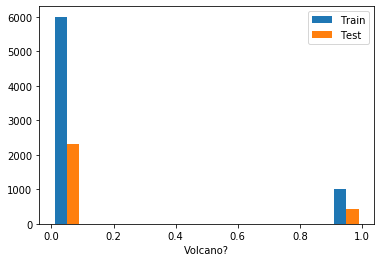

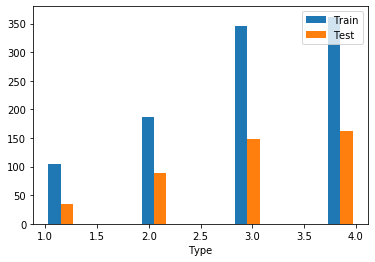

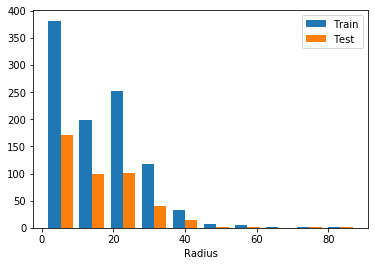

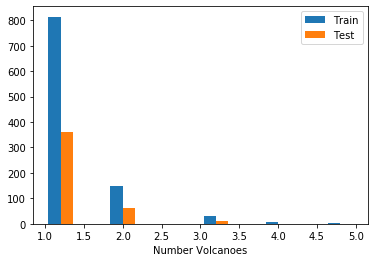

In [ ]:
for x in train_labels.keys():
  X1 = train_labels[x]
  X2 = test_labels[x]
  plt.figure()  
  plt.hist([X1, X2], label=['Train', 'Test'])
  plt.xlabel( x )
  plt.legend(loc='upper right')
  plt.savefig("/content/drive/My Drive/Colab Notebooks/projectML/attribute_histogram_"+ x +".png", format="png", dpi=300)
plt.show()

# plt.savefig("/content/drive/My Drive/Colab Notebooks/projectML/attribute_histogram_plots.png", format="png", dpi=300)

Distribuição dos valores e presença de outliers:

AxesSubplot(0.125,0.125;0.775x0.755) 

AxesSubplot(0.125,0.125;0.775x0.755) 



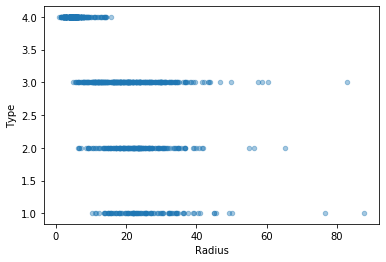

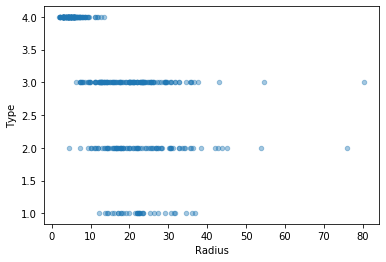

In [ ]:
print( train_labels.plot.scatter(x = "Radius", y = "Type", alpha = 0.4), "\n"  )
print( test_labels.plot.scatter(x = "Radius", y = "Type", alpha = 0.4), "\n"  )

AxesSubplot(0.125,0.125;0.352273x0.755) 

AxesSubplot(0.547727,0.125;0.352273x0.755) 



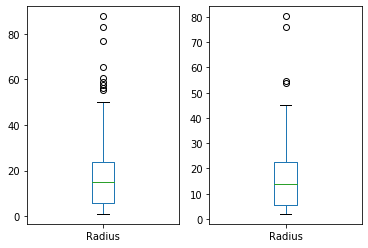

In [ ]:
plt.subplot(121)

print( train_labels["Radius"].plot( kind = 'box', figsize = ( 6, 4 ) ), "\n" )
# save_fig("attribute_histogram_plots")

plt.subplot(122)

print( test_labels["Radius"].plot( kind = 'box', figsize = ( 6, 4 ) ), "\n" )
# save_fig("attribute_histogram_plots")

## Visualização das imgens a serem utilizadas para o treinamento e teste:

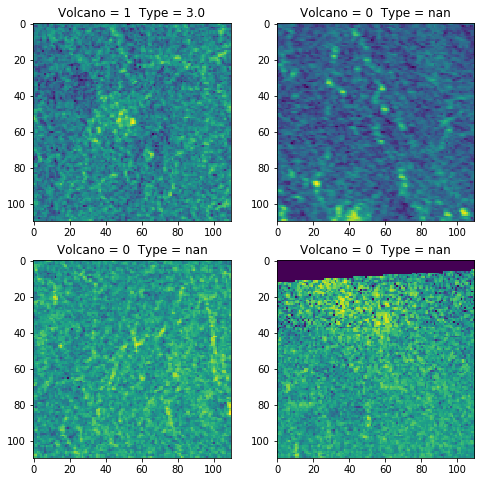

In [ ]:
f, ax = plt.subplots(1,4,figsize = (8,8))
for i in np.arange(0,4,1):
  plt.subplot( 2, 2, i+1 )
  plt.imshow(train_images_format[i,:,:,0])
  plt.title( 'Volcano = ' + str( train_labels["Volcano?"][i] ) + '  Type = ' + str( train_labels["Type"][i] ) )
plt.savefig("/content/drive/My Drive/Colab Notebooks/projectML/train_sample.png", format="png", dpi=300)

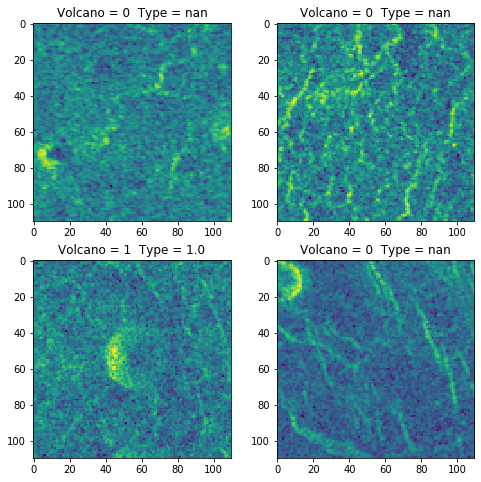

In [ ]:
f, ax = plt.subplots(1,4,figsize = (8,8))
for i in np.arange(0,4,1):
  plt.subplot( 2, 2, i+1 )
  plt.imshow(test_images_format[i,:,:,0])
  plt.title( 'Volcano = ' + str( test_labels["Volcano?"][i] ) + '  Type = ' + str( test_labels["Type"][i] ) )
plt.savefig("/content/drive/My Drive/Colab Notebooks/projectML/test_sample.png", format="png", dpi=300)

## Normalização dos dados:

In [ ]:
train_max = train_images_format.max()
test_max  = test_images_format.max()

print( train_max, "\t", test_max )

234 	 234


In [ ]:
train_images_format_norm = train_images.values/train_max
test_images_format_norm  = test_images.values/test_max

train_images_format_norm.shape
test_images_format_norm.shape

(2734, 12100)

# MLP

Primeira tentativa utilizando multilayer perceptron. Avaliação do tempo necesário, efeito do número máximo de iterações e acurácia.

Utilizando max_iter = 5:

In [ ]:
from sklearn.neural_network import MLPClassifier
import time

t0 = time.time()

sizes = np.arange( 10, 100, 10 )

training_score = []
testing_score  = []

for i in sizes:
  print( i )
  mlp1 = MLPClassifier( hidden_layer_sizes = ( i,  ), verbose = 0,  solver = 'adam',  random_state = 42,  max_iter = 5 ) #50
  mlp1.fit( train_images_format_norm,  train_labels["Volcano?"] )    
  training_score.append( mlp1.score( train_images_format_norm,  train_labels["Volcano?"] ) )
  testing_score.append( mlp1.score( test_images_format_norm,  test_labels["Volcano?"] ) )

t1 = time.time()

print( "Elapsed time {:.1f}s.".format( t1 - t0 ) )

10


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


20


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


30


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


40


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


50


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


60


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


70


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


80


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


90


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Elapsed time 91.9s.


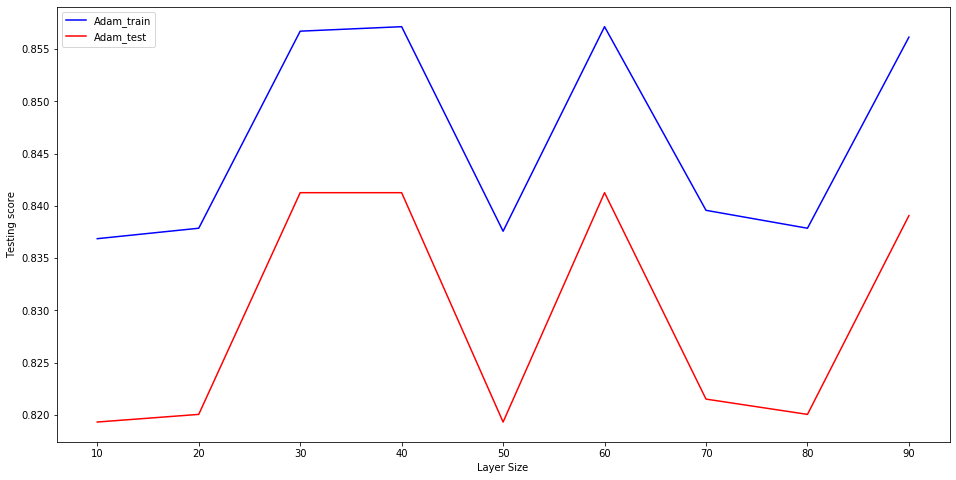

In [ ]:
fig, ax = plt.subplots( figsize=( 16, 8 ) )
ax.plot( sizes, training_score, c="blue" )
ax.plot( sizes, testing_score, c="red" )
plt.xlabel( "Layer Size" )
plt.ylabel( "Testing score" )
plt.legend( ["Adam_train", "Adam_test"] )

plt.savefig( "/content/drive/My Drive/Colab Notebooks/projectML/MLP_max_it_5.png", format="png", dpi=300 )

Utilizando max_iter = 25

In [ ]:
t0 = time.time()

training_score_maxiter = []
testing_score_maxiter  = []

for i in sizes:
  print( i )
  mlp2 = MLPClassifier( hidden_layer_sizes = ( i,  ), verbose = 0,  solver = 'adam',  random_state = 42,  max_iter = 25 ) #50
  mlp2.fit( train_images_format_norm,  train_labels["Volcano?"] )    
  training_score_maxiter.append( mlp2.score( train_images_format_norm,  train_labels["Volcano?"] ) )
  testing_score_maxiter.append( mlp2.score( test_images_format_norm,  test_labels["Volcano?"] ) )

t1 = time.time()

print( "Elapsed time {:.1f}s.".format( t1 - t0 ) )

10


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


20


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


30


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


40


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


50


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


60


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


70


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


80


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


90


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Elapsed time 410.0s.


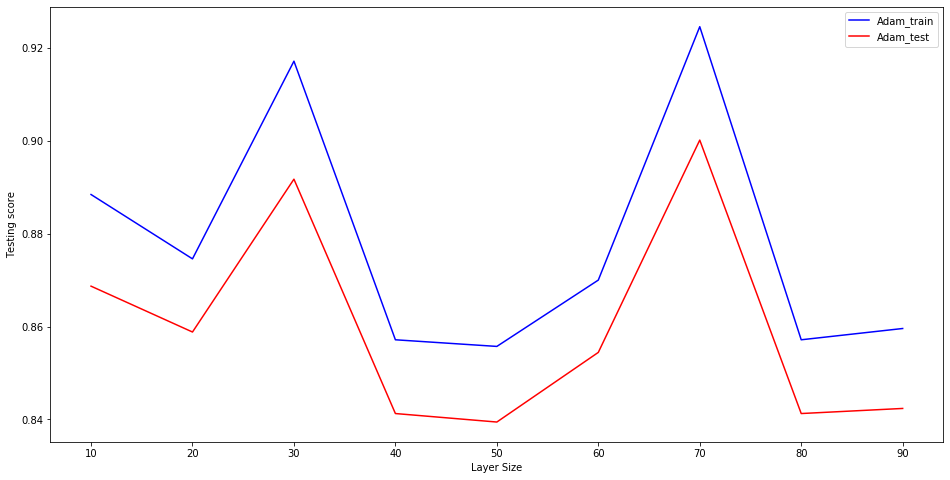

In [ ]:
fig, ax = plt.subplots( figsize=( 16, 8 ) )
ax.plot( sizes, training_score_maxiter, c="blue" )
ax.plot( sizes, testing_score_maxiter, c="red" )
plt.xlabel( "Layer Size" )
plt.ylabel( "Testing score" )
plt.legend( ["Adam_train", "Adam_test"] )

plt.savefig( "/content/drive/My Drive/Colab Notebooks/projectML/MLP_max_it_25.png", format="png", dpi=300 )

# CNN I

Utilizando redes neurais convolucionais para comparação:

In [ ]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.layers.advanced_activations import LeakyReLU 
from keras.preprocessing.image import ImageDataGenerator


Using TensorFlow backend.


In [ ]:
from keras.utils.np_utils import to_categorical

X_train = train_images_format/train_max
X_test  = test_images_format/test_max

Y_train = to_categorical(train_labels["Volcano?"], 2)
Y_test  = to_categorical(test_labels["Volcano?"], 2)


In [ ]:
model = Sequential()

model.add( Conv2D( 32, ( 3, 3 ), input_shape=( 110, 110, 1 ) ) )
model.add( Activation( 'relu' ) )
BatchNormalization( axis=-1 )
model.add( Conv2D( 32, ( 3, 3 ) ) )
model.add( Activation( 'relu' ) )
model.add( MaxPooling2D( pool_size=( 2,2 ) ) )

BatchNormalization( axis=-1 )
model.add( Conv2D( 64,( 3, 3 ) ) )
model.add( Activation( 'relu' ) )
BatchNormalization( axis=-1 )
model.add( Conv2D( 64, ( 3, 3 ) ) )
model.add( Activation( 'relu' ) )
model.add( MaxPooling2D( pool_size=( 2,2 ) ) )

model.add( Flatten() )

BatchNormalization()
model.add( Dense( 512 ) )
model.add( Activation( 'relu' ) )
BatchNormalization()
model.add( Dropout( 0.2 ) )
model.add( Dense( 2 ) )

model.add( Activation( 'softmax' ) )






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 108, 108, 32)      320       
_________________________________________________________________
activation_1 (Activation)    (None, 108, 108, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 106, 106, 32)      9248      
_________________________________________________________________
activation_2 (Activation)    (None, 106, 106, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 51, 51, 64)        18496     
_________________________________________________________________
activation_3 (Activation)    (None, 51, 51, 64)       

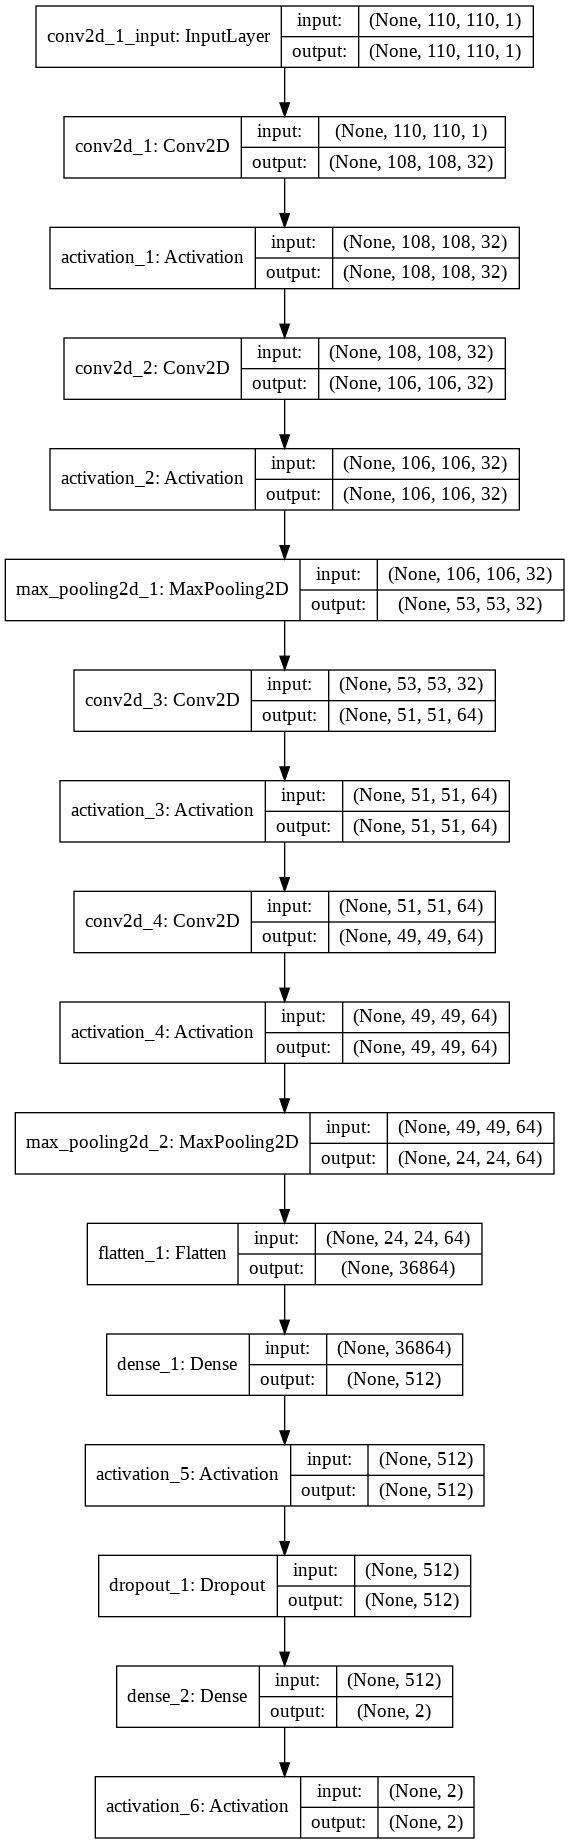

In [ ]:
from keras.utils.vis_utils import plot_model

# Plot network topology/model
plot_model( model, to_file='/content/drive/My Drive/Colab Notebooks/projectML/model.png', show_shapes = True , show_layer_names = True )

In [ ]:
model.compile( loss = 'categorical_crossentropy', optimizer = Adam(), metrics = ['accuracy'] )

In [ ]:
history = model.fit( X_train, Y_train, batch_size = 200, epochs=5, validation_data = ( X_test, Y_test ) )

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 7000 samples, validate on 2734 samples
Epoch 1/5





7000/7000 [==============================] - 23s 3ms/step - loss: 0.4747 - acc: 0.8550 - val_loss: 0.4361 - val_acc: 0.8413
Epoch 2/5
7000/7000 [==============================] - 13s 2ms/step - loss: 0.4042 - acc: 0.8571 - val_loss: 0.4298 - val_acc: 0.8413
Epoch 3/5
7000/7000 [==============================] - 13s 2ms/step - loss: 0.3975 - acc: 0.8571 - val_loss: 0.4256 - val_acc: 0.8409
Epoch 4/5
7000/7000 [==============================] - 13s 2ms/step - loss: 0.3764 - acc: 0.8576 - val_loss: 0.3542 - val_acc: 0.8416
Epoch 5/5
7000/7000 [==============================] - 13s 2ms/step - loss: 0.2549 - acc: 0.9031 - val_loss: 0.2670 - val_acc: 0.9122


In [ ]:
score = model.evaluate( X_test, Y_test )

print( "\n", 'Test accuracy: ', score[1] )

2734/2734 [==============================] - 2s 784us/step

 Test accuracy:  0.9122165325530358


2734/2734 [==============================] - 2s 681us/step
Summary: Loss over the test dataset: 0.27, Accuracy: 0.91


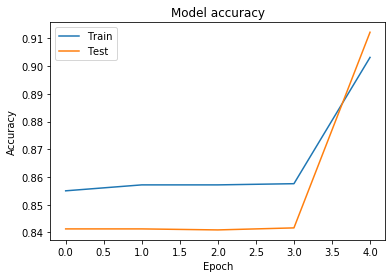

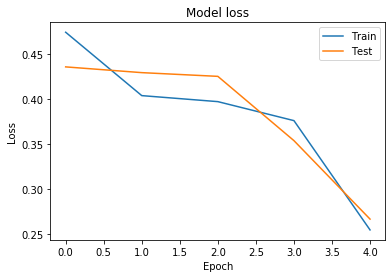

In [ ]:
evaluation = model.evaluate( X_test, Y_test, verbose = 1 )
print( 'Summary: Loss over the test dataset: %.2f, Accuracy: %.2f' % ( evaluation[0], evaluation[1] ) )

plt.plot( history.history['acc'] )
plt.plot( history.history['val_acc'] )
plt.title( 'Model accuracy' )
plt.ylabel( 'Accuracy' )
plt.xlabel( 'Epoch' )
plt.legend( ['Train', 'Test'], loc = 'upper left' )
plt.savefig( "/content/drive/My Drive/Colab Notebooks/projectML/CNNI_acc.png", format="png", dpi=300 )
plt.show()

plt.plot( history.history['loss'] )
plt.plot( history.history['val_loss'] )
plt.title( 'Model loss' )
plt.ylabel( 'Loss' )
plt.xlabel( 'Epoch' )
plt.legend( ['Train', 'Test'], loc = 'upper right' )
plt.savefig( "/content/drive/My Drive/Colab Notebooks/projectML/CNNI_loss.png", format="png", dpi=300 )
plt.show()


(2734, 2)


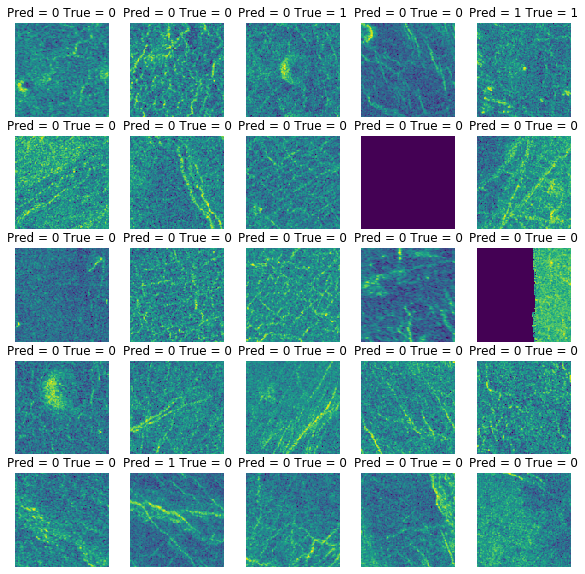

In [ ]:
Nplot = 25
plt.figure( figsize=( 10,10 ) )
Y = model.predict( X_test, batch_size=64 )
#Y=model.predict( X_test ) 
Y = Y*10.
print( Y.shape )
for n in range( Nplot ):
  X=X_test[n,:]
  ax = plt.subplot( 5, 5, n+1 )
  plt.imshow( X.reshape( 110,110 ) )
  plt.axis( 'off' )
  index        = np.argmax( Y[n] )
  indexCorrect = np.argmax( Y_test[n] )
  plt.title( 'Pred = ' + str( index ) + ' True = ' + str( indexCorrect )  )
plt.show()

# CNN I - without corrupeted images

Utilizando redes neurais convolucionais sem imagens corrompidas:

In [ ]:
X_train = pd.read_csv( '/content/drive/My Drive/Colab Notebooks/projectML/train_images.csv', sep = ',', header = None )
Y_train = pd.read_csv( '/content/drive/My Drive/Colab Notebooks/projectML/train_labels.csv' )
X_test  = pd.read_csv( '/content/drive/My Drive/Colab Notebooks/projectML/test_images.csv', sep = ',', header = None )
Y_test  = pd.read_csv( '/content/drive/My Drive/Colab Notebooks/projectML/test_labels.csv' )

print( X_train.shape )
print( Y_train.shape )
print( X_test.shape )
print( Y_test.shape )

(7000, 12100)
(7000, 4)
(2734, 12100)
(2734, 4)


In [ ]:
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split

# aqui daria para rodar um classificação de clusters superpostos e remove-los ... 
def corruptedImages( data ):
  corruptedImagesIndex = []
  print(  data.shape  )
  for index, image in enumerate( np.resize( data, ( data.shape[0], 12100 ) ) ): 
    sum = 0;
    for pixelIndex in range( 0,len( image ) ):
      sum += image[pixelIndex]
      if pixelIndex == 10:
        break
    if sum == 0:
      corruptedImagesIndex.append( index )
    else:
      sum = 0

  for index, image in enumerate( np.resize( data, ( data.shape[0], 12100 ) ) ): 
    sum = 0;
    for pixelIndex in range( 0,len( image ),110 ):
      sum += image[pixelIndex]
      if pixelIndex == 10:
        break
    if sum == 0 and index not in corruptedImagesIndex:
      corruptedImagesIndex.append( index )
    else:
      sum = 0
  return corruptedImagesIndex

def deleteCorrupted( X, y, corruptedIndexList ):
  for i in corruptedIndexList:
    X.drop( i, inplace=True ) 
    y.drop( i, inplace=True ) 
  
  X.reset_index( inplace=True ) 
  X.drop( ['index'], axis=1, inplace=True ) 
    
trainCorruptedList = corruptedImages( X_train )
testCorruptedList  = corruptedImages( X_test )

deleteCorrupted( X_train, Y_train, trainCorruptedList )
deleteCorrupted( X_test, Y_test, testCorruptedList )

Y_train = Y_train["Volcano?"]
Y_test  = Y_test["Volcano?"]

# Normalização
X_train = X_train / 255.0
X_test = X_test / 255.0

# One Hot Encoding
Y_train = to_categorical( Y_train, num_classes = 2 )
Y_test = to_categorical( Y_test, num_classes = 2 )

# Spliting
X_test, X_val, Y_test, Y_val = train_test_split( X_test, Y_test, test_size=0.5, random_state=22 )

# Resizing
X_test = np.resize( X_test, ( X_test.shape[0], 110, 110, 1 ) )
X_train = np.resize( X_train, ( X_train.shape[0], 110, 110, 1 ) )
X_val = np.resize( X_val, ( X_val.shape[0], 110, 110, 1 ) )

(7000, 12100)
(2734, 12100)


In [ ]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.layers.advanced_activations import LeakyReLU 
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
modelW = Sequential()

modelW.add( Conv2D( 32, ( 3, 3 ), input_shape=( 110,110,1 ) ) )
modelW.add( Activation( 'relu' ) )
BatchNormalization( axis=-1 )
modelW.add( Conv2D( 32, ( 3, 3 ) ) )
modelW.add( Activation( 'relu' ) )
modelW.add( MaxPooling2D( pool_size=( 2,2 ) ) )

BatchNormalization( axis=-1 )
modelW.add( Conv2D( 64,( 3, 3 ) ) )
modelW.add( Activation( 'relu' ) )
BatchNormalization( axis=-1 )
modelW.add( Conv2D( 64, ( 3, 3 ) ) )
modelW.add( Activation( 'relu' ) )
modelW.add( MaxPooling2D( pool_size=( 2,2 ) ) )

modelW.add( Flatten() )

BatchNormalization()
modelW.add( Dense( 512 ) )
modelW.add( Activation( 'relu' ) )
BatchNormalization()
modelW.add( Dropout( 0.2 ) )
modelW.add( Dense( 2 ) )

modelW.add( Activation( 'softmax' ) )

In [ ]:
modelW.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 108, 108, 32)      320       
_________________________________________________________________
activation_7 (Activation)    (None, 108, 108, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 106, 106, 32)      9248      
_________________________________________________________________
activation_8 (Activation)    (None, 106, 106, 32)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 53, 53, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 51, 51, 64)        18496     
_________________________________________________________________
activation_9 (Activation)    (None, 51, 51, 64)       

In [ ]:
# from keras.utils.vis_utils import plot_model

# # Plot network topology/model
# plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
modelW.compile( loss='categorical_crossentropy', optimizer=Adam(), metrics = ['accuracy'] )

In [ ]:
history = modelW.fit( X_train, Y_train, batch_size = 100, epochs=5, validation_data = ( X_val, Y_val ) )

Train on 6791 samples, validate on 1328 samples
Epoch 1/5
6791/6791 [==============================] - 15s 2ms/step - loss: 0.4263 - acc: 0.8489 - val_loss: 0.4775 - val_acc: 0.8245
Epoch 2/5
6791/6791 [==============================] - 12s 2ms/step - loss: 0.4186 - acc: 0.8547 - val_loss: 0.4602 - val_acc: 0.8245
Epoch 3/5
6791/6791 [==============================] - 12s 2ms/step - loss: 0.3262 - acc: 0.8781 - val_loss: 0.3235 - val_acc: 0.8592
Epoch 4/5
6791/6791 [==============================] - 12s 2ms/step - loss: 0.2720 - acc: 0.9066 - val_loss: 0.2525 - val_acc: 0.9142
Epoch 5/5
6791/6791 [==============================] - 12s 2ms/step - loss: 0.2006 - acc: 0.9342 - val_loss: 0.1941 - val_acc: 0.9330


In [ ]:
score = modelW.evaluate( X_test, Y_test )

print( "\n", 'Test accuracy: ', score[1] )

1327/1327 [==============================] - 1s 735us/step

 Test accuracy:  0.9404672193365521


1327/1327 [==============================] - 1s 658us/step
Summary: Loss over the test dataset: 0.17, Accuracy: 0.94


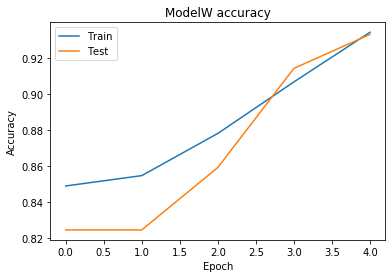

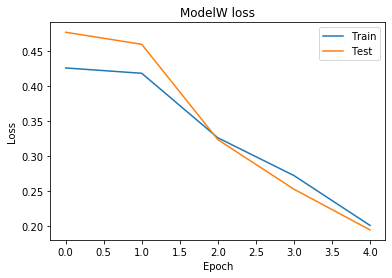

In [ ]:
evaluation = modelW.evaluate( X_test, Y_test, verbose = 1 )
print( 'Summary: Loss over the test dataset: %.2f, Accuracy: %.2f' % ( evaluation[0], evaluation[1] ) )

plt.plot( history.history['acc'] )
plt.plot( history.history['val_acc'] )
plt.title( 'ModelW accuracy' )
plt.ylabel( 'Accuracy' )
plt.xlabel( 'Epoch' )
plt.legend( ['Train', 'Test'], loc = 'upper left' )
plt.savefig("/content/drive/My Drive/Colab Notebooks/projectML/CNNIW_acc.png", format="png", dpi=300)
plt.show()

plt.plot( history.history['loss'] )
plt.plot( history.history['val_loss'] )
plt.title( 'ModelW loss' )
plt.ylabel( 'Loss' )
plt.xlabel( 'Epoch' )
plt.legend( ['Train', 'Test'], loc = 'upper right' )
plt.savefig("/content/drive/My Drive/Colab Notebooks/projectML/CNNIW_loss.png", format="png", dpi=300)
plt.show()

(1327, 2)


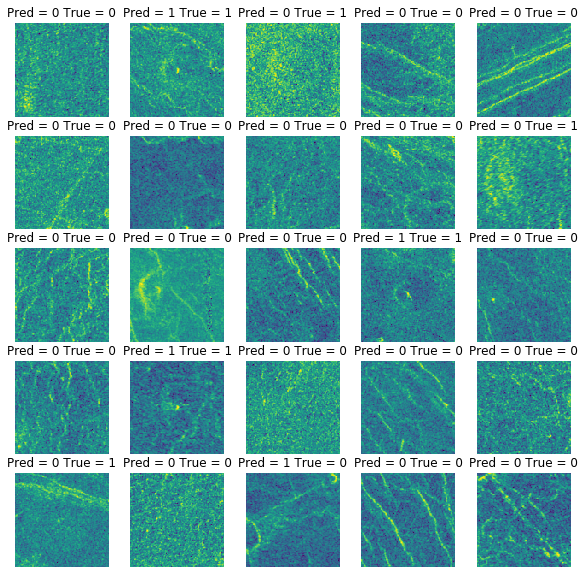

In [ ]:
Nplot = 25
plt.figure( figsize=( 10,10 ) )
Y = modelW.predict( X_test, batch_size=64 )
Y = Y*10.
print( Y.shape )
for n in range( Nplot ):
  X=X_test[n,:]
  ax = plt.subplot( 5, 5, n+1 )
  plt.imshow( X.reshape( 110,110 ) )
  plt.axis( 'off' )
  index        = np.argmax( Y[n] )
  indexCorrect = np.argmax( Y_test[n] )
  plt.title( 'Pred = ' + str( index ) + ' True = ' + str( indexCorrect )  )
plt.show()

# CNN I - without corrupeted images - without validation

Utilizando redes neurais convolucionais sem imagens corrompidas e sem dividir o conjunto de testes:

In [ ]:
X_train = pd.read_csv( '/content/drive/My Drive/Colab Notebooks/projectML/train_images.csv', sep = ',', header = None )
Y_train = pd.read_csv( '/content/drive/My Drive/Colab Notebooks/projectML/train_labels.csv' )
X_test  = pd.read_csv( '/content/drive/My Drive/Colab Notebooks/projectML/test_images.csv', sep = ',', header = None )
Y_test = pd.read_csv( '/content/drive/My Drive/Colab Notebooks/projectML/test_labels.csv' )

print( X_train.shape )
print( Y_train.shape )
print( X_test.shape )
print( Y_test.shape )

(7000, 12100)
(7000, 4)
(2734, 12100)
(2734, 4)


In [ ]:
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split

# aqui daria para rodar um classificação de clusters superpostos e remove-los ... 
def corruptedImages( data ):
  corruptedImagesIndex = []
  print(  data.shape  )
  for index, image in enumerate( np.resize( data, ( data.shape[0], 12100 ) ) ):
    sum = 0;
    for pixelIndex in range( 0,len( image ) ):
      sum += image[pixelIndex]
      if pixelIndex == 10:
        break
    if sum == 0:
      corruptedImagesIndex.append( index )
    else:
      sum = 0

  for index, image in enumerate( np.resize( data, ( data.shape[0], 12100 ) ) ): 
    sum = 0;
    for pixelIndex in range( 0,len( image ),110 ):
      sum += image[pixelIndex]
      if pixelIndex == 10:
        break
    if sum == 0 and index not in corruptedImagesIndex:
      corruptedImagesIndex.append( index )
    else:
      sum = 0
  return corruptedImagesIndex

def deleteCorrupted( X, y, corruptedIndexList ):
  for i in corruptedIndexList:
    X.drop( i, inplace=True ) # Drop the corrupted
    y.drop( i, inplace=True ) 
  
  X.reset_index( inplace=True ) 
  X.drop( ['index'], axis=1, inplace=True ) 
    
trainCorruptedList = corruptedImages( X_train )
testCorruptedList  = corruptedImages( X_test )

deleteCorrupted( X_train, Y_train, trainCorruptedList )
deleteCorrupted( X_test, Y_test, testCorruptedList )

Y_train = Y_train["Volcano?"]
Y_test  = Y_test["Volcano?"]

# Normalize
X_train = X_train / 255.0
X_test = X_test / 255.0

# One Hot Label encoding
Y_train = to_categorical( Y_train, num_classes = 2 )
Y_test = to_categorical( Y_test, num_classes = 2 )

# Lastly resizing
X_test = np.resize( X_test, ( X_test.shape[0], 110, 110, 1 ) )
X_train = np.resize( X_train, ( X_train.shape[0], 110, 110, 1 ) )
# X_val = np.resize( X_val, ( X_val.shape[0], 110, 110, 1 ) )

(7000, 12100)
(2734, 12100)


In [ ]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.layers.advanced_activations import LeakyReLU 
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
model = Sequential()

model.add( Conv2D( 32, ( 3, 3 ), input_shape=( 110,110,1 ) ) )
model.add( Activation( 'relu' ) )
BatchNormalization( axis=-1 )
model.add( Conv2D( 32, ( 3, 3 ) ) )
model.add( Activation( 'relu' ) )
model.add( MaxPooling2D( pool_size=( 2,2 ) ) )

BatchNormalization( axis=-1 )
model.add( Conv2D( 64,( 3, 3 ) ) )
model.add( Activation( 'relu' ) )
BatchNormalization( axis=-1 )
model.add( Conv2D( 64, ( 3, 3 ) ) )
model.add( Activation( 'relu' ) )
model.add( MaxPooling2D( pool_size=( 2,2 ) ) )

model.add( Flatten() )

BatchNormalization()
model.add( Dense( 512 ) )
model.add( Activation( 'relu' ) )
BatchNormalization()
model.add( Dropout( 0.2 ) )
model.add( Dense( 2 ) )

model.add( Activation( 'softmax' ) )

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 108, 108, 32)      320       
_________________________________________________________________
activation_13 (Activation)   (None, 108, 108, 32)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 106, 106, 32)      9248      
_________________________________________________________________
activation_14 (Activation)   (None, 106, 106, 32)      0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 53, 53, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 51, 51, 64)        18496     
_________________________________________________________________
activation_15 (Activation)   (None, 51, 51, 64)       

In [ ]:
# from keras.utils.vis_utils import plot_model

# # Plot network topology/model
# plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.compile( loss = 'categorical_crossentropy', optimizer = Adam(), metrics = ['accuracy'] )

In [ ]:
history = model.fit( X_train, Y_train, batch_size = 100, epochs=5, validation_data = ( X_test, Y_test ) )

Train on 6791 samples, validate on 2655 samples
Epoch 1/5
6791/6791 [==============================] - 14s 2ms/step - loss: 0.4337 - acc: 0.8448 - val_loss: 0.4566 - val_acc: 0.8373
Epoch 2/5
6791/6791 [==============================] - 13s 2ms/step - loss: 0.4156 - acc: 0.8547 - val_loss: 0.4440 - val_acc: 0.8373
Epoch 3/5
6791/6791 [==============================] - 13s 2ms/step - loss: 0.4065 - acc: 0.8547 - val_loss: 0.4128 - val_acc: 0.8373
Epoch 4/5
6791/6791 [==============================] - 13s 2ms/step - loss: 0.3400 - acc: 0.8809 - val_loss: 0.2375 - val_acc: 0.9194
Epoch 5/5
6791/6791 [==============================] - 13s 2ms/step - loss: 0.2294 - acc: 0.9236 - val_loss: 0.2648 - val_acc: 0.9228


In [ ]:
score = model.evaluate( X_test, Y_test )

print( "\n", 'Test accuracy: ', score[1] )

2655/2655 [==============================] - 2s 698us/step

 Test accuracy:  0.9227871936368852


2655/2655 [==============================] - 2s 646us/step
Summary: Loss over the test dataset: 0.26, Accuracy: 0.92


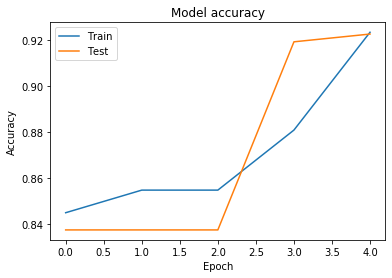

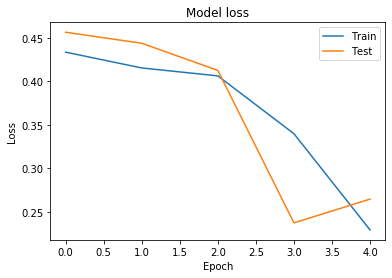

In [ ]:
evaluation = model.evaluate( X_test, Y_test, verbose = 1 )
print( 'Summary: Loss over the test dataset: %.2f, Accuracy: %.2f' % ( evaluation[0], evaluation[1] ) )

plt.plot( history.history['acc'] )
plt.plot( history.history['val_acc'] )
plt.title( 'Model accuracy' )
plt.ylabel( 'Accuracy' )
plt.xlabel( 'Epoch' )
plt.legend( ['Train', 'Test'], loc = 'upper left' )
plt.show()

plt.plot( history.history['loss'] )
plt.plot( history.history['val_loss'] )
plt.title( 'Model loss' )
plt.ylabel( 'Loss' )
plt.xlabel( 'Epoch' )
plt.legend( ['Train', 'Test'], loc = 'upper right' )
plt.show()

(2655, 2)


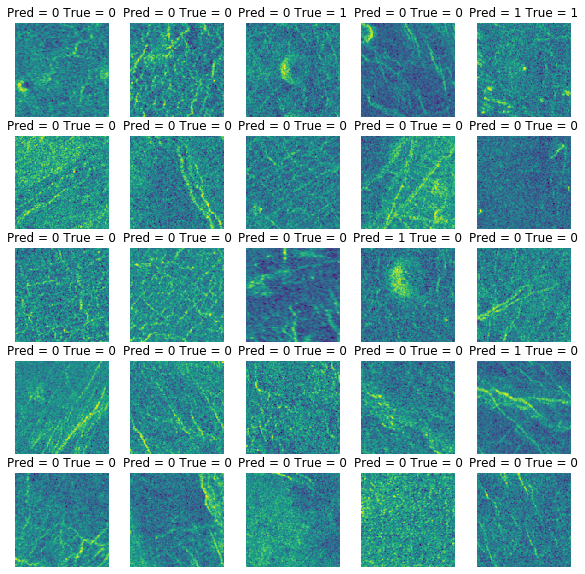

In [ ]:
Nplot = 25
plt.figure( figsize=( 10,10 ) )
Y = model.predict( X_test, batch_size=64 )
Y = Y*10.
print( Y.shape )
for n in range( Nplot ):
  X=X_test[n,:]
  ax = plt.subplot( 5, 5, n+1 )
  plt.imshow( X.reshape( 110,110 ) )
  plt.axis( 'off' )
  index        = np.argmax( Y[n] )
  indexCorrect = np.argmax( Y_test[n] )
  plt.title( 'Pred = ' + str( index ) + ' True = ' + str( indexCorrect )  )
plt.show()

# CNN II

Variação utilizando redes neurais convolucionais sem dividir o conjunto de testes:

In [ ]:
from keras.utils.np_utils import to_categorical

X_train = train_images_format/train_max
X_test  = test_images_format/test_max

Y_train = to_categorical( train_labels["Volcano?"], 2 )
Y_test  = to_categorical( test_labels["Volcano?"], 2 )


In [ ]:
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout
from keras.optimizers import Adam

modelA = Sequential()
modelA.add( Conv2D( filters = 8, kernel_size = ( 5, 5 ), activation  = 'relu', input_shape = ( 110, 110, 1 ) ) )
modelA.add( MaxPool2D( pool_size = ( 2, 2 ) ) )
modelA.add( Conv2D( filters = 16, kernel_size = ( 3, 3 ), activation  = 'relu' ) )
modelA.add( MaxPool2D( pool_size = ( 2, 2 ) ) )
modelA.add( Flatten() )
modelA.add( Dense( Y_train.shape[1], activation = "sigmoid" ) )

In [ ]:
modelA.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 106, 106, 8)       208       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 53, 53, 8)         0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 51, 51, 16)        1168      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 25, 25, 16)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 20002     
Total params: 21,378
Trainable params: 21,378
Non-trainable params: 0
__________________________________________________

In [ ]:
# from keras.utils.vis_utils import plot_model

# # Plot network topology/model
# plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
modelA.compile( loss = 'categorical_crossentropy', optimizer = Adam(), metrics = ['accuracy'] )

In [ ]:
history = modelA.fit( X_train, Y_train, batch_size = 200, epochs = 5, validation_data = ( X_test, Y_test ) )

Train on 7000 samples, validate on 2734 samples
Epoch 1/5
7000/7000 [==============================] - 4s 576us/step - loss: 0.4294 - acc: 0.8381 - val_loss: 0.4320 - val_acc: 0.8413
Epoch 2/5
7000/7000 [==============================] - 3s 472us/step - loss: 0.4034 - acc: 0.8571 - val_loss: 0.4335 - val_acc: 0.8413
Epoch 3/5
7000/7000 [==============================] - 3s 473us/step - loss: 0.4001 - acc: 0.8571 - val_loss: 0.4330 - val_acc: 0.8413
Epoch 4/5
7000/7000 [==============================] - 3s 469us/step - loss: 0.3964 - acc: 0.8571 - val_loss: 0.4337 - val_acc: 0.8413
Epoch 5/5
7000/7000 [==============================] - 3s 473us/step - loss: 0.3932 - acc: 0.8571 - val_loss: 0.4244 - val_acc: 0.8413


In [ ]:
score = modelA.evaluate( X_test, Y_test )

print( "\n", 'Test accuracy: ', score[1] )

2734/2734 [==============================] - 1s 249us/step

 Test accuracy:  0.8412582295692655


2734/2734 [==============================] - 1s 227us/step
Summary: Loss over the test dataset: 0.42, Accuracy: 0.84


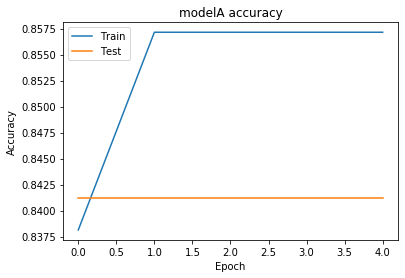

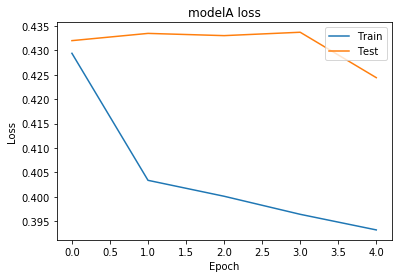

In [ ]:
evaluation = modelA.evaluate(X_test, Y_test, verbose=1)
print('Summary: Loss over the test dataset: %.2f, Accuracy: %.2f' % (evaluation[0], evaluation[1]))

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('modelA accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('modelA loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

(2734, 2)


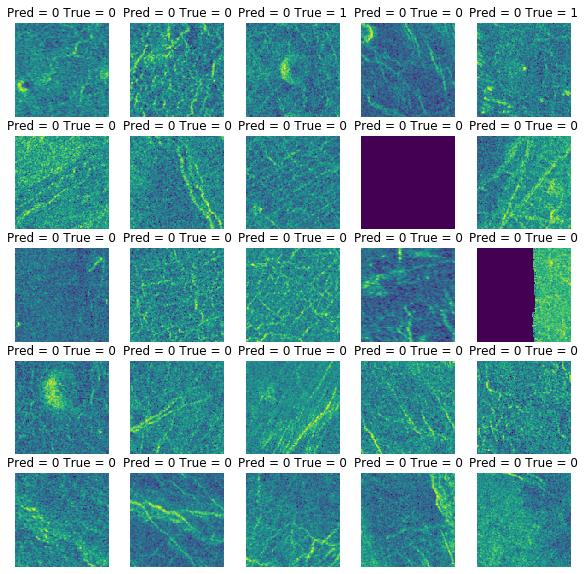

In [ ]:
Nplot = 25
plt.figure( figsize = ( 10, 10 ) )
Y = modelA.predict( X_test, batch_size=64 )
Y = Y*10.
print( Y.shape )
for n in range( Nplot ):
  X=X_test[n,:]
  ax = plt.subplot( 5, 5, n + 1 )
  plt.imshow( X.reshape( 110, 110 ) )
  plt.axis( 'off' )
  index        = np.argmax( Y[n] )
  indexCorrect = np.argmax( Y_test[n] )
  plt.title( 'Pred = ' + str(index) + ' True = ' + str( indexCorrect ) )
plt.show()

# CNN III

Variação utilizando redes neurais convolucionais sem dividir o conjunto de testes:

In [ ]:
from keras.utils.np_utils import to_categorical

X_train = train_images_format/train_max
X_test  = test_images_format/test_max

Y_train = to_categorical(train_labels["Volcano?"], 2)
Y_test  = to_categorical(test_labels["Volcano?"], 2)


In [ ]:
IMAGE_SHAPE  =  ( 110, 110, 1 )

# model
def get_model():
  modelBtemp  =  Sequential()
  
  modelBtemp.add( Conv2D( 64, ( 2, 2 ),  input_shape = IMAGE_SHAPE,  activation = 'relu' ) )
  modelBtemp.add( MaxPooling2D( pool_size = ( 2, 2 ) ) )
  modelBtemp.add( Dropout( rate = 0.3 ) )
  
  modelBtemp.add( Conv2D( 96, ( 4, 4 ), activation = 'relu' ) )
  modelBtemp.add( MaxPooling2D( pool_size = ( 2, 2 ) ) )
  modelBtemp.add( Dropout( rate = 0.45 ) )

  modelBtemp.add( Conv2D( 128, ( 5, 5 ), activation = 'relu' ) )
  modelBtemp.add( MaxPooling2D( pool_size = ( 2, 2 ) ) )
  modelBtemp.add( Dropout( rate = 0.4 ) )
  
  modelBtemp.add( Conv2D( 128, ( 6, 6 ), activation = 'relu' ) )
  modelBtemp.add( MaxPooling2D( pool_size = ( 2, 2 ) ) )
  modelBtemp.add( Dropout( rate = 0.4 ) )
  
  modelBtemp.add( Flatten() )
  modelBtemp.add( Dense( 64, activation = 'relu' ) )
  modelBtemp.add( Dropout( rate = 0.35 ) )
  modelBtemp.add( Dense( 2, activation = "sigmoid" ) )
  
  return modelBtemp

modelB  =  get_model()


In [ ]:
modelB.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 109, 109, 64)      320       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 51, 51, 96)        98400     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 25, 25, 96)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 25, 25, 96)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 21, 21, 128)      

In [ ]:
# from keras.utils.vis_utils import plot_model

# # Plot network topology/model
# plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
modelB.compile( loss = 'categorical_crossentropy', optimizer = Adam(), metrics = ['accuracy'] )

In [ ]:
history = modelB.fit( X_train, Y_train, batch_size = 200, epochs = 5, validation_data = ( X_test, Y_test ) )

Train on 7000 samples, validate on 2734 samples
Epoch 1/5
7000/7000 [==============================] - 16s 2ms/step - loss: 0.4490 - acc: 0.8433 - val_loss: 0.4559 - val_acc: 0.8413
Epoch 2/5
7000/7000 [==============================] - 13s 2ms/step - loss: 0.4178 - acc: 0.8571 - val_loss: 0.4735 - val_acc: 0.8413
Epoch 3/5
7000/7000 [==============================] - 13s 2ms/step - loss: 0.4170 - acc: 0.8571 - val_loss: 0.4646 - val_acc: 0.8413
Epoch 4/5
7000/7000 [==============================] - 13s 2ms/step - loss: 0.4136 - acc: 0.8571 - val_loss: 0.4583 - val_acc: 0.8413
Epoch 5/5
7000/7000 [==============================] - 13s 2ms/step - loss: 0.4132 - acc: 0.8571 - val_loss: 0.4416 - val_acc: 0.8413


In [ ]:
score = modelB.evaluate( X_test, Y_test )

print( "\n", 'Test accuracy: ', score[1] )

2734/2734 [==============================] - 2s 765us/step

 Test accuracy:  0.8412582295692655


2734/2734 [==============================] - 2s 695us/step
Summary: Loss over the test dataset: 0.44, Accuracy: 0.84


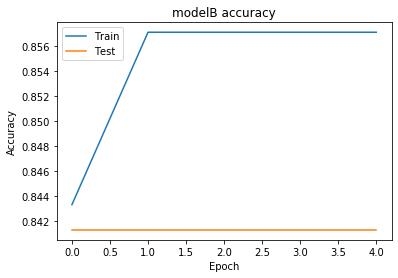

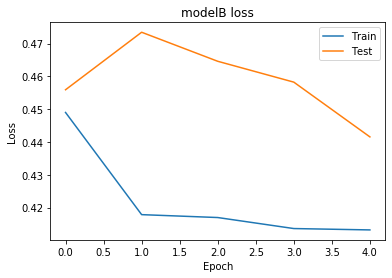

In [ ]:
evaluation = modelB.evaluate( X_test, Y_test, verbose = 1 )
print( 'Summary: Loss over the test dataset: %.2f, Accuracy: %.2f' % ( evaluation[0], evaluation[1] ) )

plt.plot( history.history['acc'] )
plt.plot( history.history['val_acc'] )
plt.title( 'modelB accuracy' )
plt.ylabel( 'Accuracy' )
plt.xlabel( 'Epoch' )
plt.legend( ['Train', 'Test'], loc='upper left' )
plt.show()

plt.plot( history.history['loss'] )
plt.plot( history.history['val_loss'] )
plt.title( 'modelB loss' )
plt.ylabel( 'Loss' )
plt.xlabel( 'Epoch' )
plt.legend( ['Train', 'Test'], loc='upper right' )
plt.show()

(2734, 2)


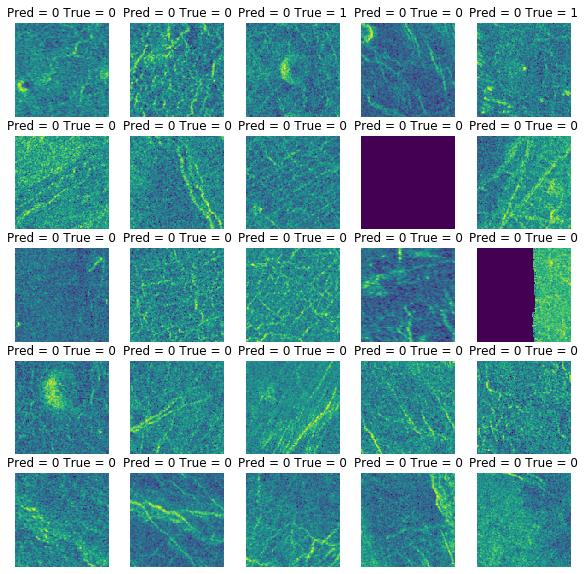

In [ ]:
Nplot = 25
plt.figure( figsize = ( 10, 10 ) )
Y = modelB.predict( X_test, batch_size = 64 )
Y = Y*10.
print( Y.shape )
for n in range( Nplot ):
  X  = X_test[n, :]
  ax = plt.subplot( 5, 5, n+1 )
  plt.imshow( X.reshape( 110, 110 ) )
  plt.axis( 'off' )
  index        = np.argmax( Y[n] )
  indexCorrect = np.argmax( Y_test[n] )
  plt.title( 'Pred = ' + str( index ) + ' True = ' + str( indexCorrect )  )
plt.show()

# Denoising

## **Simulation data to train the network:**



Aruivos possuem 1000 frames cada com o número de clusters dados por uma distribuição gaussiana com média 50 e desvio 10.

In [ ]:
train_size = 500
test_size  = 500

################################# Clean #####################################################

originaldata = np.loadtxt( "/content/drive/My Drive/Colab Notebooks/projectML/originaldata.dat", dtype = float )

clean_data   = np.reshape( originaldata, ( -1, 256, 256, 1 ) )
clean_data   =  np.abs( clean_data[0:train_size] ) 
print( clean_data.shape )

clean_test_data = np.reshape( originaldata, ( -1, 256, 256, 1 ) )
clean_test_data =  np.abs( clean_test_data[train_size:( train_size + test_size  )] ) 
print( clean_test_data.shape )

del originaldata

################################# Noisy #####################################################

noisydata  = np.loadtxt( "/content/drive/My Drive/Colab Notebooks/projectML/noisydata.dat", dtype = float )

noisy_data = np.reshape( noisydata, ( -1, 256, 256, 1 ) )
noisy_data =  np.abs( noisy_data[0:train_size] ) 
print( noisy_data.shape )

noisy_test_data = np.reshape( noisydata, ( -1, 256, 256, 1 ) )
noisy_test_data =  np.abs( noisy_test_data[train_size:( train_size + test_size  )] ) 
print( noisy_test_data.shape )

del noisydata

(500, 256, 256, 1)
(500, 256, 256, 1)
(500, 256, 256, 1)
(500, 256, 256, 1)


## **Denoising:**

In [ ]:
import keras
from keras.models import Model
from keras.datasets import mnist
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Input, UpSampling2D

Using TensorFlow backend.


In [ ]:
par0 = 1; par1 = 2; par2 = 1;

input_img = Input( shape=( 256, 256, 1 ) )

x = Convolution2D( 512, par1, par1, activation = 'relu', border_mode = 'same' )( input_img )
x = MaxPooling2D( ( par2, par2 ), border_mode = 'same' )( x )
x = Convolution2D( par0, par1, par1, activation = 'relu', border_mode = 'same' )( x )

encoded = MaxPooling2D( ( par2, par2 ), border_mode = 'same' )( x )


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (2, 2), activation="relu", padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D((1, 1), padding="same")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(1, (2, 2), activation="relu", padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D((1, 1), padding="same")`
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
x = Convolution2D( par0, par1, par1, activation = 'relu', border_mode = 'same' )( encoded )
x = UpSampling2D( ( par2, par2 ) )( x )
x = Convolution2D( par0, par1, par1, activation = 'relu', border_mode = 'same' )( x )
x = UpSampling2D( ( par2, par2 ) )( x )
decoded = Convolution2D( 1, par1, par1, activation='relu', border_mode = 'same' )( x )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(1, (2, 2), activation="relu", padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(1, (2, 2), activation="relu", padding="same")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(1, (2, 2), activation="relu", padding="same")`
  


In [ ]:
autoencoder = Model( input_img, decoded )
autoencoder.compile( optimizer = 'adam', loss = 'binary_crossentropy', metrics=["accuracy"] )
autoencoder.summary()



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 1)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 512)     2560      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 256, 256, 512)     0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 256, 256, 1)       2049      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 256, 256, 1)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 256, 256, 1)       5         
_____________________________

In [ ]:
# from keras.utils.vis_utils import plot_model

# # Plot network topology/model
# plot_model(autoencoder, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
auto = autoencoder.fit( noisy_data, clean_data,
  nb_epoch        = 1,
  batch_size      = 1,
  shuffle         = True,
  validation_data = ( noisy_test_data, clean_test_data))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """





Train on 500 samples, validate on 500 samples
Epoch 1/1





500/500 [==============================] - 20s 41ms/step - loss: -900.9609 - acc: 0.9878 - val_loss: -893.5389 - val_acc: 0.9886


In [ ]:
encoder = Model( input = input_img, output = encoded )
encoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 1)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 512)     2560      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 256, 256, 512)     0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 256, 256, 1)       2049      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 256, 256, 1)       0         
Total params: 4,609
Trainable params: 4,609
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("ma...)`
  """Entry point for launching an IPython kernel.


In [ ]:
encoded_input = Input( shape = ( 256/(par2*par2), 256/(par2*par2), par0 ) )

decoder1 = autoencoder.layers[-5]
decoder2 = autoencoder.layers[-4]
decoder3 = autoencoder.layers[-3]
decoder4 = autoencoder.layers[-2]
decoder5 = autoencoder.layers[-1]
decoder = Model( input = encoded_input, output = decoder5( decoder4 (decoder3 (decoder2 (decoder1 ( encoded_input ) ) ) ) ) )
decoder.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 256.0, 256.0, 1)   0         
_________________________________________________________________
conv2d_3 (Conv2D)            multiple                  5         
_________________________________________________________________
up_sampling2d_1 (UpSampling2 multiple                  0         
_________________________________________________________________
conv2d_4 (Conv2D)            multiple                  5         
_________________________________________________________________
up_sampling2d_2 (UpSampling2 multiple                  0         
_________________________________________________________________
conv2d_5 (Conv2D)            multiple                  5         
Total params: 15
Trainable params: 15
Non-trainable params: 0
_______________________________________________________________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
  if __name__ == '__main__':


In [ ]:
encoded_imgs = encoder.predict( noisy_test_data )

decoded_imgs = decoder.predict( encoded_imgs )

print( encoded_imgs.shape )
print( decoded_imgs.shape )

(500, 256, 256, 1)
(500, 256, 256, 1)


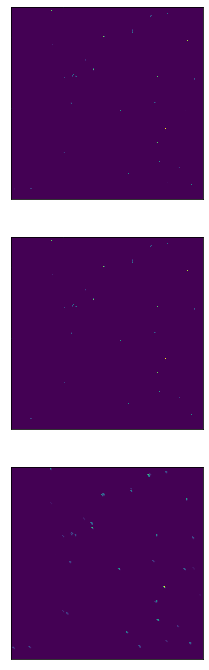

In [ ]:
n = 1
plt.figure( figsize=( 12, 12 ) )

for i in range( n ):
  # noisy images
  ax = plt.subplot( 3, n, i + 1 )
  plt.imshow( noisy_test_data[i].reshape( 256, 256 ) )
  plt.colormaps(  )
  ax.get_xaxis(  ).set_visible( False )
  ax.get_yaxis(  ).set_visible( False )

  # original images
  ax = plt.subplot( 3, n, i + 1 + n )
  plt.imshow( clean_test_data[i].reshape( 256, 256 ) )
  plt.colormaps(  ) #gray
  ax.get_xaxis(  ).set_visible( False )
  ax.get_yaxis(  ).set_visible( False )

  # denoised images
  ax = plt.subplot( 3, n, i + 1 + n*2 )
  plt.imshow( decoded_imgs[i].reshape( 256, 256 ) )
  plt.colormaps(  )
  ax.get_xaxis(  ).set_visible( False )
  ax.get_yaxis(  ).set_visible( False )
plt.show(  )

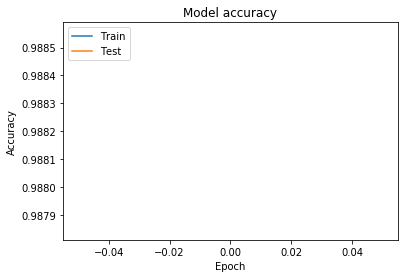

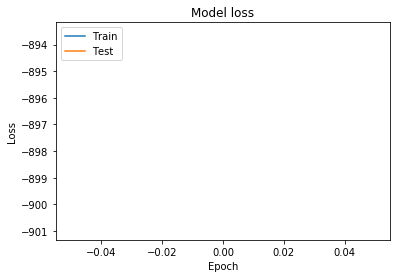

In [ ]:
plt.plot(auto.history['acc'])
plt.plot(auto.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(auto.history['loss'])
plt.plot(auto.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## **Second try:**

In [ ]:
import keras
from keras.models import Model
from keras.datasets import mnist
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Input, UpSampling2D

input_img = Input( shape=( 256, 256, 1 ) )

x = Convolution2D( 64, kernel_size = (3, 3) , strides = (1, 1), activation = 'relu', border_mode = 'same' )( input_img )
x = MaxPooling2D( pool_size = (2, 2), strides = (2, 2), border_mode = 'same' )( x )
x = Convolution2D( 128, kernel_size = (2, 2) , strides = (2, 2), activation = 'relu', border_mode = 'same' )( x )

encoded = MaxPooling2D( pool_size = (2, 2), border_mode = 'same' )( x )

x = Convolution2D( 128, kernel_size = (2, 2) , strides = (2, 2), activation = 'relu', border_mode = 'same' )( encoded )
x = UpSampling2D( (2, 2) )( x )
x = Convolution2D( 64, kernel_size = (2, 2) , strides = (1, 1), activation = 'relu', border_mode = 'same' )( x )
x = UpSampling2D( (2, 2) )( x )
x = Convolution2D( 32, kernel_size = (2, 2) , strides = (1, 1), activation = 'relu', border_mode = 'same' )( x )
x = UpSampling2D( (2, 2) )( x )
x = Convolution2D( 16, kernel_size = (2, 2) , strides = (1, 1), activation = 'relu', border_mode = 'same' )( x )
x = UpSampling2D( (2, 2) )( x )

decoded = Convolution2D( 1, kernel_size = (2, 2) , strides = (1, 1), activation='relu', border_mode = 'same' )( x )

autoencoder = Model( input_img, decoded )
autoencoder.compile( optimizer = 'adadelta', loss = 'mse', metrics=["accuracy"] )
autoencoder.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 256, 256, 1)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 256, 256, 64)      640       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 64, 64, 128)       32896     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 128)       65664     
_________________________________________________________________
up_sampling2d_3 (UpSampling2 (None, 32, 32, 128)       0   

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="same")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding="same")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, kernel_size=(2, 2), strides=(2, 2), activation="relu", padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, ker

In [ ]:
# from keras.utils.vis_utils import plot_model

# # Plot network topology/model
# plot_model(autoencoder, to_file='model.png', show_shapes=True, show_layer_names=True)


In [ ]:
auto = autoencoder.fit( noisy_data, clean_data,
  nb_epoch        = 100,
  batch_size      = 20,
  shuffle         = True,
  validation_data = ( noisy_test_data, clean_test_data))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 500 samples, validate on 500 samples
Epoch 1/100
500/500 [==============================] - 3s 5ms/step - loss: 3181390.9400 - acc: 0.8225 - val_loss: 3066916.0700 - val_acc: 0.9181
Epoch 2/100
500/500 [==============================] - 2s 4ms/step - loss: 3121229.0500 - acc: 0.9225 - val_loss: 3084694.0100 - val_acc: 0.9560
Epoch 3/100
500/500 [==============================] - 2s 4ms/step - loss: 3045861.9000 - acc: 0.9544 - val_loss: 2983096.7400 - val_acc: 0.9677
Epoch 4/100
500/500 [==============================] - 2s 4ms/step - loss: 2943691.7000 - acc: 0.9687 - val_loss: 2759554.5000 - val_acc: 0.9800
Epoch 5/100
500/500 [==============================] - 2s 4ms/step - loss: 2831361.8600 - acc: 0.9780 - val_loss: 2752159.6300 - val_acc: 0.9717
Epoch 6/100
500/500 [==============================] - 2s 4ms/step - loss: 2775106.6900 - acc: 0.9830 - val_loss: 2899654.8500 - val_acc: 0.9941
Epoch 7/100
500/500 [==============================] - 2s 4ms/step - loss: 2727417.9

In [ ]:
encoder = Model( input = input_img, output = encoded )
encoder.summary()

encoded_input = Input( shape = ( 32, 32, 128 ) )

decoder00 = autoencoder.layers[-7]
decoder0 = autoencoder.layers[-6]
decoder1 = autoencoder.layers[-5]
decoder2 = autoencoder.layers[-4]
decoder3 = autoencoder.layers[-3]
decoder4 = autoencoder.layers[-2]
decoder5 = autoencoder.layers[-1]
decoder = Model( input = encoded_input, output = decoder5( decoder4 (decoder3 (decoder2 (decoder1 ( decoder0 (decoder00 (encoded_input ))) ) ) ) ) )
decoder.summary()

encoded_imgs = encoder.predict( noisy_test_data )

decoded_imgs = decoder.predict( encoded_imgs )

print( encoded_imgs.shape )
print( decoded_imgs.shape )

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 256, 256, 1)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 256, 256, 64)      640       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 64, 64, 128)       32896     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 128)       0         
Total params: 33,536
Trainable params: 33,536
Non-trainable params: 0
_________________________________________________________________
Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Sh

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("ma...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`


(500, 32, 32, 128)
(500, 256, 256, 1)


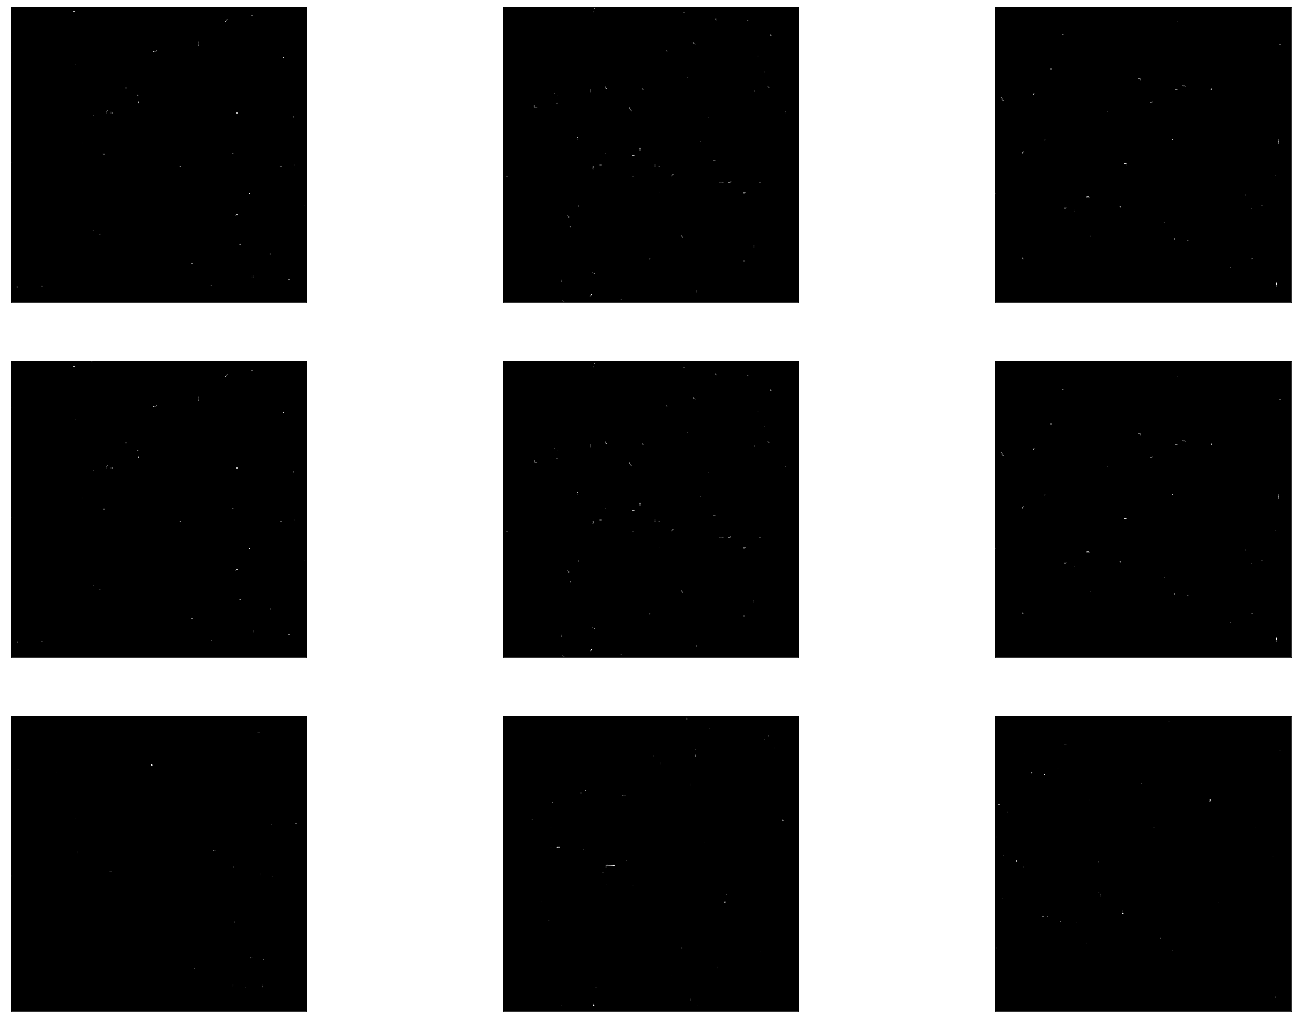

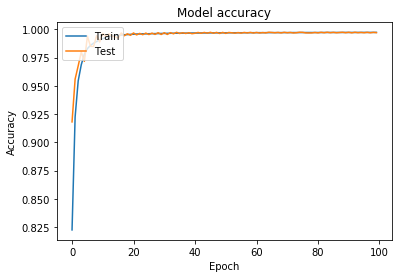

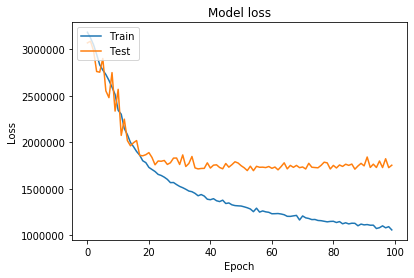

In [ ]:
n = 3

plt.figure( figsize=( 25, 25 ) )

for i in range( n ):
  # noisy images
  ax = plt.subplot( 4, n, i + 1 )
  plt.imshow( noisy_test_data[i].reshape( 256, 256 ) )
  plt.gray()
  ax.get_xaxis().set_visible( False )
  ax.get_yaxis().set_visible( False )

  # original images
  ax = plt.subplot( 4, n, i + 1 + n )
  plt.imshow( clean_test_data[i].reshape( 256, 256 ) )
  plt.gray() #gray
  ax.get_xaxis().set_visible( False )
  ax.get_yaxis().set_visible( False )

  # denoised images
  ax = plt.subplot( 4, n, i + 1 + n*2 )
  plt.imshow( decoded_imgs[i].reshape( 256, 256 ) )
  plt.gray()
  ax.get_xaxis().set_visible( False )
  ax.get_yaxis().set_visible( False )

plt.show()

plt.plot( auto.history['acc'] )
plt.plot( auto.history['val_acc'] )
plt.title( 'Model accuracy' )
plt.ylabel( 'Accuracy' )
plt.xlabel( 'Epoch' )
plt.legend( ['Train', 'Test'], loc='upper left' )
plt.show()

plt.plot( auto.history['loss'] )
plt.plot( auto.history['val_loss'] )
plt.title( 'Model loss' )
plt.ylabel( 'Loss' )
plt.xlabel( 'Epoch' )
plt.legend( ['Train', 'Test'], loc='upper left' )
plt.show()

## **Reverse Denoising I:**

Input of frames measured only with BG ans train the network to cancel these values. In the predic part, input with signal no BG should be intact and inputs with signal and BG should be cleaned.

In [ ]:
train_size = 500 
test_size  = 500 

################################# bg #####################################################

originaldata = np.fromfile( "/content/drive/My Drive/Colab Notebooks/projectML/bg_longitudinal.tpx", dtype = np.int16 )

bg_data   = np.reshape( originaldata, ( -1, 256, 256, 1 ) )
bg_data   =  bg_data[0:5000]
print( bg_data.shape )

bg_test_data   = np.reshape( originaldata, ( -1, 256, 256, 1 ) )
bg_test_data   =  bg_test_data[5000:10000]
print( bg_test_data.shape )

zero_data = np.reshape( originaldata, ( -1, 256, 256, 1 ) )
zero_data =  zero_data[0:( 5000 )]*0
print( zero_data.shape )

zero_test_data = np.reshape( originaldata, ( -1, 256, 256, 1 ) )
zero_test_data =  zero_test_data[5000:( 5000 + 5000 )]*0
print( zero_test_data.shape )

del originaldata

################################# Noisy #####################################################

noisydata  = np.loadtxt( "/content/drive/My Drive/Colab Notebooks/projectML/noisydata.dat", dtype = float )

noisy_data = np.reshape( noisydata, ( -1, 256, 256, 1 ) )
noisy_data =  noisy_data[0:train_size]
print( noisy_data.shape )

noisy_test_data = np.reshape( noisydata, ( -1, 256, 256, 1 ) )
noisy_test_data =  noisy_test_data[train_size:( train_size + test_size  )]
print( noisy_test_data.shape )

del noisydata

(5000, 256, 256, 1)
(5000, 256, 256, 1)
(5000, 256, 256, 1)
(5000, 256, 256, 1)
(500, 256, 256, 1)
(500, 256, 256, 1)


In [ ]:
import keras
from keras.models import Model
from keras.datasets import mnist
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Input, UpSampling2D

input_img = Input( shape=( 256, 256, 1 ) )

x = Convolution2D( 64, kernel_size = (3, 3) , strides = (1, 1), activation = 'relu', border_mode = 'same' )( input_img )
x = MaxPooling2D( pool_size = (2, 2), strides = (2, 2), border_mode = 'same' )( x )
x = Convolution2D( 128, kernel_size = (2, 2) , strides = (2, 2), activation = 'relu', border_mode = 'same' )( x )

encoded = MaxPooling2D( pool_size = (2, 2), border_mode = 'same' )( x )

x = Convolution2D( 128, kernel_size = (2, 2) , strides = (2, 2), activation = 'relu', border_mode = 'same' )( encoded )
x = UpSampling2D( (2, 2) )( x )
x = Convolution2D( 64, kernel_size = (2, 2) , strides = (1, 1), activation = 'relu', border_mode = 'same' )( x )
x = UpSampling2D( (2, 2) )( x )
x = Convolution2D( 32, kernel_size = (2, 2) , strides = (1, 1), activation = 'relu', border_mode = 'same' )( x )
x = UpSampling2D( (2, 2) )( x )
x = Convolution2D( 16, kernel_size = (2, 2) , strides = (1, 1), activation = 'relu', border_mode = 'same' )( x )
x = UpSampling2D( (2, 2) )( x )

decoded = Convolution2D( 1, kernel_size = (2, 2) , strides = (1, 1), activation='relu', border_mode = 'same' )( x )

autoencoder = Model( input_img, decoded )
autoencoder.compile( optimizer = 'adadelta', loss = 'mse', metrics=["accuracy"] )
autoencoder.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 256, 256, 1)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 256, 256, 64)      640       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 64, 64, 128)       32896     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 16, 16, 128)       65664     
_________________________________________________________________
up_sampling2d_7 (UpSampling2 (None, 32, 32, 128)       0   

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="same")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding="same")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, kernel_size=(2, 2), strides=(2, 2), activation="relu", padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, ker

In [ ]:
# from keras.utils.vis_utils import plot_model

# # Plot network topology/model
# plot_model(autoencoder, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
auto = autoencoder.fit( bg_data, zero_data,
  nb_epoch        = 10,
  batch_size      = 20,
  shuffle         = True,
  validation_data = ( bg_test_data, zero_test_data) )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 16s 3ms/step - loss: 9.5614e-06 - acc: 1.0000 - val_loss: 2.8200e-06 - val_acc: 1.0000
Epoch 2/10
5000/5000 [==============================] - 15s 3ms/step - loss: 1.6900e-06 - acc: 1.0000 - val_loss: 1.7769e-06 - val_acc: 1.0000
Epoch 3/10
5000/5000 [==============================] - 15s 3ms/step - loss: 1.0024e-06 - acc: 1.0000 - val_loss: 1.3345e-06 - val_acc: 1.0000
Epoch 4/10
5000/5000 [==============================] - 15s 3ms/step - loss: 7.1087e-07 - acc: 1.0000 - val_loss: 1.0821e-06 - val_acc: 1.0000
Epoch 5/10
5000/5000 [==============================] - 16s 3ms/step - loss: 5.5124e-07 - acc: 1.0000 - val_loss: 9.1819e-07 - val_acc: 1.0000
Epoch 6/10
5000/5000 [==============================] - 15s 3ms/step - loss: 4.4997e-07 - acc: 1.0000 - val_loss: 8.0131e-07 - val_acc: 1.0000
Epoch 7/10
5000/5000 [==============================] - 15s 3ms/step - loss: 3.7892e-07 - acc:

In [ ]:
encoder = Model( input = input_img, output = encoded )
encoder.summary()

encoded_input = Input( shape = ( 32, 32, 128 ) )

decoder00 = autoencoder.layers[-7]
decoder0 = autoencoder.layers[-6]
decoder1 = autoencoder.layers[-5]
decoder2 = autoencoder.layers[-4]
decoder3 = autoencoder.layers[-3]
decoder4 = autoencoder.layers[-2]
decoder5 = autoencoder.layers[-1]
decoder = Model( input = encoded_input, output = decoder5( decoder4 (decoder3 (decoder2 (decoder1 ( decoder0 (decoder00 (encoded_input ))) ) ) ) ) )
decoder.summary()

encoded_imgs = encoder.predict( noisy_test_data )

decoded_imgs = decoder.predict( encoded_imgs )

print( encoded_imgs.shape )
print( decoded_imgs.shape )

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 256, 256, 1)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 256, 256, 64)      640       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 64, 64, 128)       32896     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 32, 32, 128)       0         
Total params: 33,536
Trainable params: 33,536
Non-trainable params: 0
_________________________________________________________________
Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Sh

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("ma...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`


(500, 32, 32, 128)
(500, 256, 256, 1)


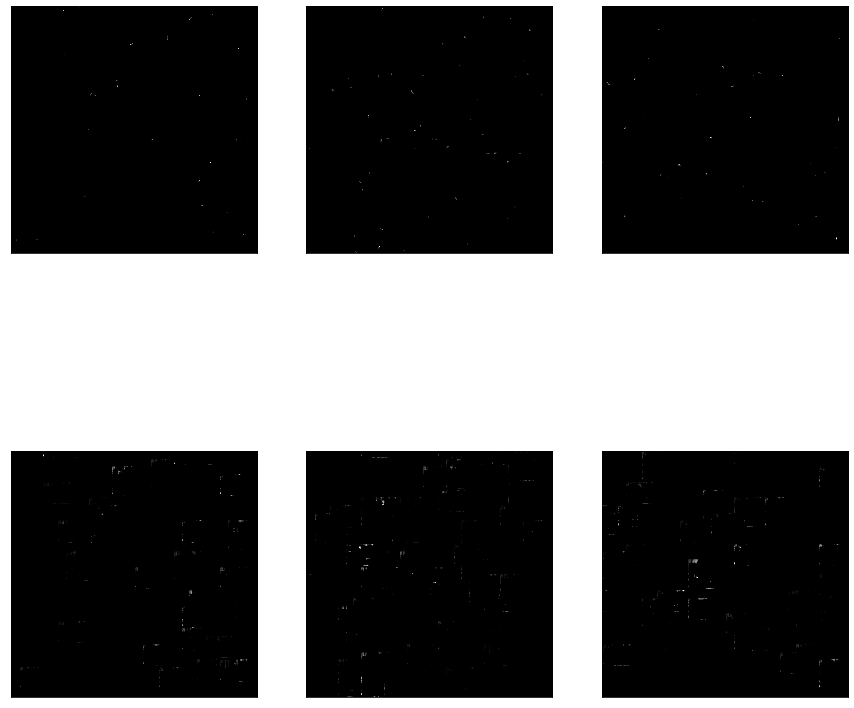

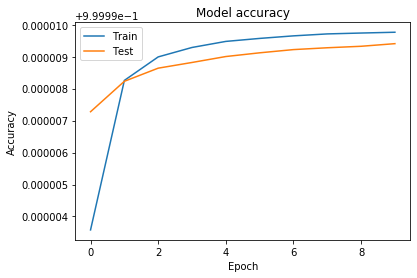

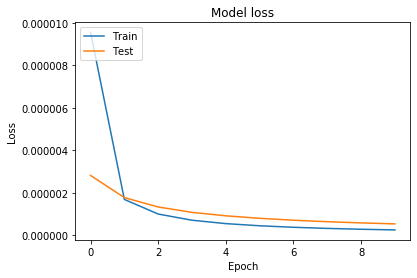

In [ ]:
n = 3

plt.figure( figsize=( 15, 15 ) )

for i in range( n ):
  # noisy images
  ax = plt.subplot( 2, n, i + 1 )
  plt.imshow( noisy_test_data[i].reshape( 256, 256 ) )
  plt.gray(  )
  ax.get_xaxis(  ).set_visible( False )
  ax.get_yaxis(  ).set_visible( False )

  # denoised images
  ax = plt.subplot( 2, n, i + 1 + n )
  plt.imshow( decoded_imgs[i].reshape( 256, 256 ) )
  plt.gray(  )
  ax.get_xaxis(  ).set_visible( False )
  ax.get_yaxis(  ).set_visible( False )

plt.show(  )

plt.plot(auto.history['acc'])
plt.plot(auto.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(auto.history['loss'])
plt.plot(auto.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## **Reverse Denoising II:**

Input of frames measured only with BG ans train the network to cancel these values. In the predic part, input with signal no BG should be intact and inputs with signal and BG should be cleaned.

In [ ]:
train_size = 500 
test_size  = 500

################################# bg #####################################################

originaldata = np.fromfile("/content/drive/My Drive/Colab Notebooks/projectML/bg_longitudinal.tpx", dtype = np.int16)

bg_data   = np.reshape(originaldata, (-1, 256, 256, 1))
bg_data   =  bg_data[0:500]
print(bg_data.shape)

bg_test_data   = np.reshape(originaldata, (-1, 256, 256, 1))
bg_test_data   =  bg_test_data[500:1000]
print(bg_test_data.shape)

del originaldata

################################# Noisy #####################################################

noisydata  = np.loadtxt("/content/drive/My Drive/Colab Notebooks/projectML/noisydata.dat", dtype = float)

noisy_data = np.reshape(noisydata, (-1, 256, 256, 1))
noisy_data =  noisy_data[0:train_size]
print(noisy_data.shape)

noisy_test_data = np.reshape(noisydata, (-1, 256, 256, 1))
noisy_test_data =  noisy_test_data[train_size:(train_size + test_size )]
print(noisy_test_data.shape)

del noisydata

##############################################################################################

train_data =  bg_data + noisy_data
print(train_data.shape)

train_test_data =  bg_test_data + noisy_test_data
print(train_test_data.shape)

(500, 256, 256, 1)
(500, 256, 256, 1)
(500, 256, 256, 1)
(500, 256, 256, 1)
(500, 256, 256, 1)
(500, 256, 256, 1)


In [ ]:
import keras
from keras.models import Model
from keras.datasets import mnist
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Input, UpSampling2D

input_img = Input( shape=( 256, 256, 1 ) )

x = Convolution2D( 64, kernel_size = (3, 3) , strides = (1, 1), activation = 'relu', border_mode = 'same' )( input_img )
x = MaxPooling2D( pool_size = (2, 2), strides = (2, 2), border_mode = 'same' )( x )
x = Convolution2D( 128, kernel_size = (2, 2) , strides = (2, 2), activation = 'relu', border_mode = 'same' )( x )

encoded = MaxPooling2D( pool_size = (2, 2), border_mode = 'same' )( x )

x = Convolution2D( 128, kernel_size = (2, 2) , strides = (2, 2), activation = 'relu', border_mode = 'same' )( encoded )
x = UpSampling2D( (2, 2) )( x )
x = Convolution2D( 64, kernel_size = (2, 2) , strides = (1, 1), activation = 'relu', border_mode = 'same' )( x )
x = UpSampling2D( (2, 2) )( x )
x = Convolution2D( 32, kernel_size = (2, 2) , strides = (1, 1), activation = 'relu', border_mode = 'same' )( x )
x = UpSampling2D( (2, 2) )( x )
x = Convolution2D( 16, kernel_size = (2, 2) , strides = (1, 1), activation = 'relu', border_mode = 'same' )( x )
x = UpSampling2D( (2, 2) )( x )

decoded = Convolution2D( 1, kernel_size = (2, 2) , strides = (1, 1), activation='relu', border_mode = 'same' )( x )

autoencoder = Model( input_img, decoded )
autoencoder.compile( optimizer = 'adadelta', loss = 'mse', metrics=["accuracy"] )
autoencoder.summary()

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 256, 256, 1)       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 256, 256, 64)      640       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 64, 64, 128)       32896     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 16, 16, 128)       65664     
_________________________________________________________________
up_sampling2d_11 (UpSampling (None, 32, 32, 128)       0  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="same")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding="same")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, kernel_size=(2, 2), strides=(2, 2), activation="relu", padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, ker

In [ ]:
# from keras.utils.vis_utils import plot_model

# # Plot network topology/model
# plot_model(autoencoder, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
auto = autoencoder.fit( train_data, bg_data,
  nb_epoch        = 10,
  batch_size      = 20,
  shuffle         = True,
  validation_data = ( train_test_data, bg_test_data ) )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Train on 500 samples, validate on 500 samples
Epoch 1/10
500/500 [==============================] - 3s 5ms/step - loss: 42.9412 - acc: 0.9960 - val_loss: 0.2142 - val_acc: 0.9997
Epoch 2/10
500/500 [==============================] - 2s 4ms/step - loss: 0.1594 - acc: 0.9998 - val_loss: 0.1570 - val_acc: 0.9999
Epoch 3/10
500/500 [==============================] - 2s 4ms/step - loss: 0.1266 - acc: 0.9999 - val_loss: 0.1394 - val_acc: 0.9999
Epoch 4/10
500/500 [==============================] - 2s 4ms/step - loss: 0.1152 - acc: 0.9999 - val_loss: 0.1331 - val_acc: 1.0000
Epoch 5/10
500/500 [==============================] - 2s 4ms/step - loss: 0.1111 - acc: 1.0000 - val_loss: 0.1308 - val_acc: 1.0000
Epoch 6/10
500/500 [==============================] - 2s 4ms/step - loss: 0.1095 - acc: 1.0000 - val_loss: 0.1299 - val_acc: 1.0000
Epoch 7/10
500/500 [==============================] - 2s 4ms/step - loss: 0.1088 - acc: 1.0000 - val_loss: 0.1294 - val_acc: 1.0000
Epoch 8/10
500/500 [=========

In [ ]:
encoder = Model( input = input_img, output = encoded )
encoder.summary()

encoded_input = Input( shape = ( 32, 32, 128 ) )

decoder00 = autoencoder.layers[-7]
decoder0 = autoencoder.layers[-6]
decoder1 = autoencoder.layers[-5]
decoder2 = autoencoder.layers[-4]
decoder3 = autoencoder.layers[-3]
decoder4 = autoencoder.layers[-2]
decoder5 = autoencoder.layers[-1]
decoder = Model( input = encoded_input, output = decoder5( decoder4 (decoder3 (decoder2 (decoder1 ( decoder0 (decoder00 (encoded_input ))) ) ) ) ) )
decoder.summary()

encoded_imgs = encoder.predict( train_test_data )

decoded_imgs = decoder.predict( encoded_imgs )

print( encoded_imgs.shape )
print( decoded_imgs.shape )

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 256, 256, 1)       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 256, 256, 64)      640       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 64, 64, 128)       32896     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 32, 32, 128)       0         
Total params: 33,536
Trainable params: 33,536
Non-trainable params: 0
_________________________________________________________________
Model: "model_12"
_________________________________________________________________
Layer (type)                 Output 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("ma...)`
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
  del sys.path[0]


(500, 32, 32, 128)
(500, 256, 256, 1)


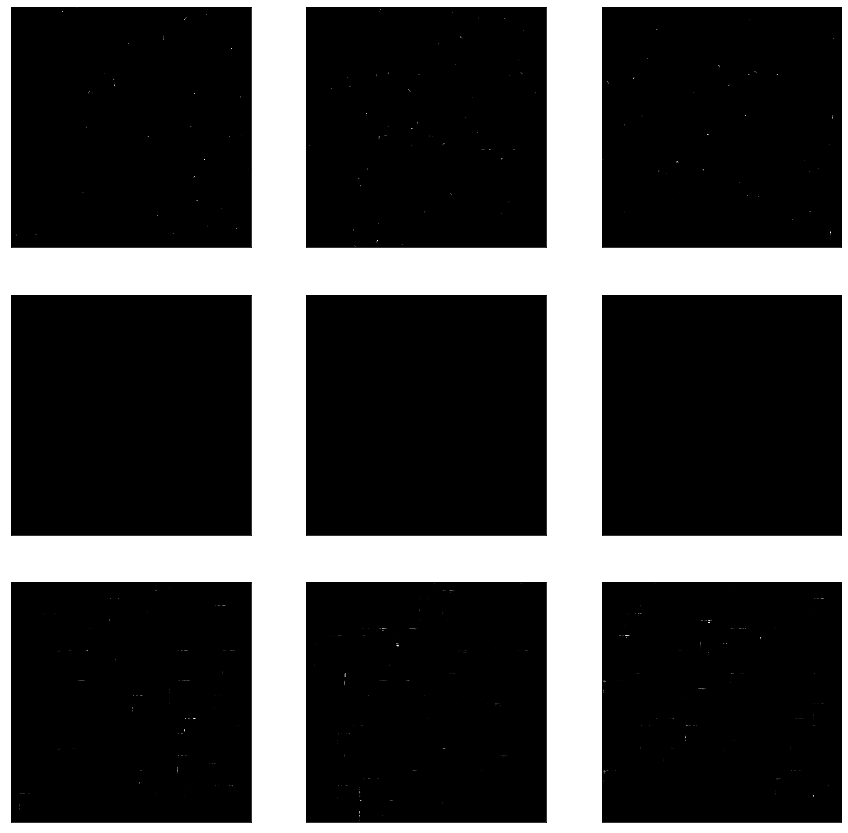

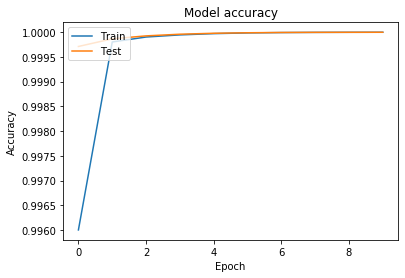

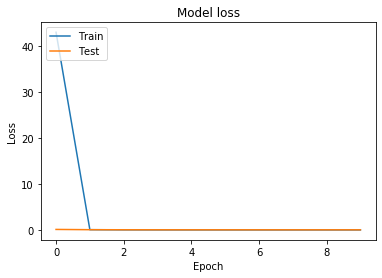

In [ ]:
n = 3

plt.figure( figsize=( 15, 15 ) )

for i in range( n ):
  # noisy images
  ax = plt.subplot( 3, n, i + 1 )
  plt.imshow( train_test_data[i].reshape( 256, 256 ) )
  plt.gray()
  ax.get_xaxis().set_visible( False )
  ax.get_yaxis().set_visible( False )

  # original images
  ax = plt.subplot( 3, n, i + 1 + n )
  plt.imshow( bg_test_data[i].reshape( 256, 256 ) )
  plt.gray() #gray
  ax.get_xaxis().set_visible( False )
  ax.get_yaxis().set_visible( False )

  # denoised images
  ax = plt.subplot( 3, n, i + 1 + n*2 )
  plt.imshow( decoded_imgs[i].reshape( 256, 256 ) )
  plt.gray()
  ax.get_xaxis().set_visible( False )
  ax.get_yaxis().set_visible( False )

plt.show()

plt.plot(auto.history['acc'])
plt.plot(auto.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(auto.history['loss'])
plt.plot(auto.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()